
### Homework4:  Color-Magnitude Diagram, Part 1


In [59]:
import matplotlib.pyplot as plt
import numpy as np


In [60]:
# We are going to use the database Vizier for this assignment:

from astroquery.vizier import Vizier
from astropy.table import Table

# for documentation on astropy.coordinates:     https://docs.astropy.org/en/stable/coordinates/index.html
# for documentation on Vizier:    https://astroquery.readthedocs.io/en/latest/vizier/vizier.html

### Astronomical catalogs and databases

A decent summary of available astronomical catalogs and databases:

https://astrodatascience.net/astronomical-catalogs-and-databases/

But stick to "astroquery", the other option ("hypatie") is much less supported.

In [61]:
import astropy

sirius = astropy.coordinates.SkyCoord.from_name('Sirius')
print(sirius)

<SkyCoord (ICRS): (ra, dec) in deg
    (101.28715533, -16.71611586)>


In [62]:
# Very simple object query
sirius = Vizier.query_object("sirius")
print(sirius)

TableList with 396 tables:
	'0:METAobj' with 5 column(s) and 6 row(s) 
	'1:ReadMeObj' with 5 column(s) and 6 row(s) 
	'2:I/34/greenw2a' with 16 column(s) and 1 row(s) 
	'3:I/40/catalog' with 11 column(s) and 1 row(s) 
	'4:I/80/n30' with 13 column(s) and 1 row(s) 
	'5:I/82/catalog' with 11 column(s) and 1 row(s) 
	'6:I/87B/catalog' with 13 column(s) and 1 row(s) 
	'7:I/98A/catalog' with 20 column(s) and 1 row(s) 
	'8:I/98A/remarks' with 6 column(s) and 1 row(s) 
	'9:I/100A/w10' with 9 column(s) and 1 row(s) 
	'10:I/100A/w25' with 9 column(s) and 1 row(s) 
	'11:I/100A/w50' with 9 column(s) and 5 row(s) 
	'12:I/113A/catalog' with 10 column(s) and 1 row(s) 
	'13:I/131A/sao' with 11 column(s) and 1 row(s) 
	'14:I/143/fk4_1950' with 15 column(s) and 1 row(s) 
	'15:I/149A/catalog' with 6 column(s) and 1 row(s) 
	'16:I/193/ppm2' with 12 column(s) and 1 row(s) 
	'17:I/196/main' with 14 column(s) and 1 row(s) 
	'18:I/196/annex1' with 10 column(s) and 4 row(s) 
	'19:I/197A/tic' with 10 column(s) 

In [63]:
# Let's be more specific about what we want:

v = Vizier(columns=['_RAJ2000', '_DEJ2000','B-V', 'Vmag', 'Plx'])
sirius = v.query_object("sirius")  #this gives you a list of catalogs/databases with data on Sirius.
print(sirius)

# If we had wanted to restrict our search to things with V magnitude > 10, we could do something like the following:
# v = Vizier(columns=['_RAJ2000', '_DEJ2000','B-V', 'Vmag', 'Plx'],
#            column_filters={"Vmag":">10"})


TableList with 396 tables:
	'0:METAobj' with 2 column(s) and 6 row(s) 
	'1:ReadMeObj' with 2 column(s) and 6 row(s) 
	'2:I/34/greenw2a' with 2 column(s) and 1 row(s) 
	'3:I/40/catalog' with 3 column(s) and 1 row(s) 
	'4:I/80/n30' with 2 column(s) and 1 row(s) 
	'5:I/82/catalog' with 2 column(s) and 1 row(s) 
	'6:I/87B/catalog' with 2 column(s) and 1 row(s) 
	'7:I/98A/catalog' with 2 column(s) and 1 row(s) 
	'8:I/98A/remarks' with 2 column(s) and 1 row(s) 
	'9:I/100A/w10' with 2 column(s) and 1 row(s) 
	'10:I/100A/w25' with 2 column(s) and 1 row(s) 
	'11:I/100A/w50' with 2 column(s) and 5 row(s) 
	'12:I/113A/catalog' with 3 column(s) and 1 row(s) 
	'13:I/131A/sao' with 3 column(s) and 1 row(s) 
	'14:I/143/fk4_1950' with 2 column(s) and 1 row(s) 
	'15:I/149A/catalog' with 3 column(s) and 1 row(s) 
	'16:I/193/ppm2' with 2 column(s) and 1 row(s) 
	'17:I/196/main' with 5 column(s) and 1 row(s) 
	'18:I/196/annex1' with 2 column(s) and 4 row(s) 
	'19:I/197A/tic' with 3 column(s) and 1 row(s) 

In [64]:
# We asked for 5 things: ['_RAJ2000', '_DEJ2000','B-V', 'Vmag', 'Plx'], so consider only those tables
# with at least 5 columns, like 'I/196/main'

# To see the data from a catalog, you have to specify its name:

print(sirius['I/196/main'])

  _RAJ2000     _DEJ2000    B-V    Vmag  Plx
    deg          deg       mag    mag   mas
------------ ------------ ------ ------ ---
101.28696250 -16.71610833  0.009 -1.440 374


In [65]:
# Here is a list of the 25 brightest stars in the sky

# Question 1: Using the example above, write code to query all these stars instead of just Sirius, 
# from catalog='I/196/main'


brightest_list = ["Sirius","Canopus","Arcturus","Alpha Centauri","Vega","Capella","Rigel","Procyon","Betelgeuse",
            "Achernar","Hadar","Acrux","Altair","Aldebaran","Antares","Spica","Pollux","Fomalhaut","Becrux",
           "Deneb","Regulus","Adhara","Shaula","Gacrux","Castor"]

brightest_catalog = v.query_object(brightest_list, catalog = 'I/196/main')

In [66]:
# Check out what that catalog gives you:

print(brightest_catalog['I/196/main'])

  _RAJ2000     _DEJ2000    B-V    Vmag  Plx
    deg          deg       mag    mag   mas
------------ ------------ ------ ------ ---
101.28696250 -16.71610833  0.009 -1.440 374
 95.98799583 -52.69569444  0.164 -0.736  17
213.91532083  19.18241944  1.231 -0.050  90
219.89950000 -60.83538889  0.900  1.350 754
219.89950000 -60.83538889  0.710 -0.010 754
279.23471667  38.78365833 -0.001  0.033 123
 79.17230417  45.99802778  0.795  0.080  73
 78.63445000  -8.20166111  0.000  0.100   4
114.82547083   5.22501667  0.432  0.400 283
 88.79294583   7.40704167     --  0.870   5
         ...          ...    ...    ... ...
247.35182917 -26.43198611  1.930  1.020  12
201.29827917 -11.16130833 -0.235  0.976  19
116.32894167  28.02618333  0.991  1.161  93
344.41272917 -29.62225000  0.088  1.166 144
310.35798750  45.28036389  0.092  1.246 -13
152.09297917  11.96719167 -0.087  1.360  39
104.65645000 -28.97208333 -0.211  1.502  --
263.40222500 -37.10381111 -0.231  1.620  --
187.79137083 -57.11319444  1.600

In [67]:
# This looks pretty good, but the catalog does not everything we want for every object on our list.


In [68]:
# Question 2: Try another catalog: 'I/239/hip_main', which is the Hipparcos catalog

brightest_catalog = v.query_object(brightest_list,catalog='I/239/hip_main')


In [69]:
# To see contents of the table, have to specify the name of catalog:

print(brightest_catalog['I/239/hip_main']) 

   _RAJ2000       _DEJ2000     B-V    Vmag   Plx  
     deg            deg        mag    mag    mas  
-------------- -------------- ------ ----- -------
101.2871553865 -16.7161158193  0.009 -1.44  379.21
 95.9879577998 -52.6956604587  0.164 -0.62   10.43
213.9153001021  19.1824102958  1.239 -0.05   88.85
219.8961702590 -60.8371560362  0.900  1.35  742.12
219.9020658387 -60.8339746814  0.710 -0.01  742.12
279.2347351065  38.7836917958 -0.001  0.03  128.93
 79.1723293990  45.9979911065  0.795  0.08   77.29
 78.6344681221  -8.2016405511 -0.030  0.18    4.22
114.8254930096   5.2249930634  0.432  0.40  285.93
 88.7929385961   7.4070627358  1.500  0.45    7.63
           ...            ...    ...   ...     ...
247.3519204627 -26.4320024932  1.865  1.06    5.40
201.2982470099 -11.1613220315 -0.235  0.98   12.44
116.3289598275  28.0261986152  0.991  1.16   96.74
344.4126937230 -29.6222361527  0.145  1.17  130.08
310.3579780887  45.2803379974  0.092  1.25    1.01
152.0929611023  11.9672070633 -

In [70]:
# Let's save these data into a table

brightest_data = brightest_catalog['I/239/hip_main']

In [71]:
type(brightest_data)

# the table is in the format astropy.table.table.Table

astropy.table.table.Table

In [72]:
print(brightest_data)

   _RAJ2000       _DEJ2000     B-V    Vmag   Plx  
     deg            deg        mag    mag    mas  
-------------- -------------- ------ ----- -------
101.2871553865 -16.7161158193  0.009 -1.44  379.21
 95.9879577998 -52.6956604587  0.164 -0.62   10.43
213.9153001021  19.1824102958  1.239 -0.05   88.85
219.8961702590 -60.8371560362  0.900  1.35  742.12
219.9020658387 -60.8339746814  0.710 -0.01  742.12
279.2347351065  38.7836917958 -0.001  0.03  128.93
 79.1723293990  45.9979911065  0.795  0.08   77.29
 78.6344681221  -8.2016405511 -0.030  0.18    4.22
114.8254930096   5.2249930634  0.432  0.40  285.93
 88.7929385961   7.4070627358  1.500  0.45    7.63
           ...            ...    ...   ...     ...
247.3519204627 -26.4320024932  1.865  1.06    5.40
201.2982470099 -11.1613220315 -0.235  0.98   12.44
116.3289598275  28.0261986152  0.991  1.16   96.74
344.4126937230 -29.6222361527  0.145  1.17  130.08
310.3579780887  45.2803379974  0.092  1.25    1.01
152.0929611023  11.9672070633 -

In [73]:
# Convert that astropy table into a pandas dataframe as soon as possible, because it is so much easier to deal with tables
# in pandas
# Call this dataframe 'brightest_df'

# How to go from astropy to pandas:  https://docs.astropy.org/en/stable/table/pandas.html
# Pandas in 10 minutes:  https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html


from astropy.table import Table
import pandas as pd
brightest_df = brightest_data.to_pandas()


In [74]:
# Look at the top 5 rows:

brightest_df.head()

,_RAJ2000,_DEJ2000,B-V,Vmag,Plx
0,101.287155,-16.716116,0.009,-1.44,379.209991
1,95.987958,-52.695660,0.164,-0.62,10.430000
2,213.915300,19.182410,1.239,-0.05,88.849998
3,219.896170,-60.837156,0.900,1.35,742.119995
4,219.902066,-60.833975,0.710,-0.01,742.119995


In [75]:
# Question 3: We forgot to include the Sun.  
# Please add the Sun, using the following data: RA = 0, Dec = 0, Vmag = -26.8, B-V = 0.63, parallax = 8.8 arcsec
# Caution: be careful about parallax units.

brightest_df.loc[25] = [0, 0, .63, -26.8, 8800]
brightest_df

,_RAJ2000,_DEJ2000,B-V,Vmag,Plx
0,101.287155,-16.716116,0.009,-1.44,379.209991
1,95.987958,-52.695660,0.164,-0.62,10.430000
2,213.915300,19.182410,1.239,-0.05,88.849998
3,219.896170,-60.837156,0.900,1.35,742.119995
4,219.902066,-60.833975,0.710,-0.01,742.119995
5,279.234735,38.783692,-0.001,0.03,128.929993
6,79.172329,45.997991,0.795,0.08,77.290001
7,78.634468,-8.201641,-0.030,0.18,4.220000
8,114.825493,5.224993,0.432,0.40,285.929993
9,88.792939,7.407063,1.500,0.45,7.630000


Text(0, 0.5, 'Negative Vmag (unitless)')

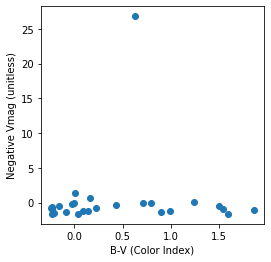

In [77]:
# Question 4:  Now make your first color-magnitude diagram.
# Plot 'B-V' on x-axis, 'Vmag' on y-axis.
# Remember to have y-axis oriented so that bright magnitudes are at the top, faint magnitudes are at bottom.
# Does it look like the color-magnitude plot shown in class? Why or why not?

fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(brightest_df['B-V'], -brightest_df['Vmag']) #plot negative 
ax.set_xlabel('B-V (Color Index)')
ax.set_ylabel('Negative Vmag (unitless)')

#This does not look like the plot shown in class because we need to consider absolute magnitude instead of apparent magnitude.

Text(0, 0.5, 'Negative Absolute magnitude (at 10 pc)')

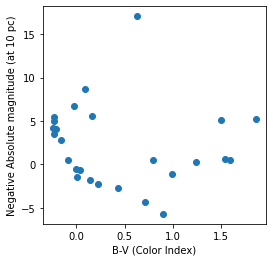

In [82]:
# Question 5: What is wrong with plotting Vmag vs. B-V?
# That's right, you need absolute magnitude, to remove the distance factor.
# First make a column called 'D([parsec])' to get the distance in parsec. 
# Caution: check the unit of parallax before you calculate anything.
# Then make a column called "AbsV", and calculate the absolute M_V magnitude from the equation:

brightest_df["D([parsec])"] = 1/(0.001 * brightest_df["Plx"]) #parallax is in milliarcseconds

# m - M = 5 log10(D) - 5
# where D = distance in parsec

brightest_df["AbsV"] = brightest_df["Vmag"] - 5*np.log10(brightest_df["D([parsec])"]) + 5


fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(brightest_df['B-V'], -brightest_df['AbsV']) #plot negative 
ax.set_xlabel('B-V (Color Index)')
ax.set_ylabel('Negative Absolute magnitude (at 10 pc)')

# Does the plot look like the color-magnitude plot shown in class? 
# Why or why not?

#This looks a lot more like the diagram seen in class because we are looking at absolute magnitude now. 


In [93]:
# We are going to try to improve our color-magnitude diagram, using Vizier again
# By default, Vizier limits its output to 50 rows only, and supposedly setting 
# Vizier.ROW_LIMIT = -1  should fix the problem.
# But it doesn't, so have to add "row_limit" to the query.

# We are going to look for the nearest stars, regardless of apparent magnitude.
# 'Nearest' here means < 6 pc, which means parallax should be > 1/6 = 0.167 arcsec.

# The following queries RA, Dec, B-V, Vmag, for all stars with parallax > 160 milliarcsec from the 
# Hipparcos catalog:

nearest = Vizier(columns=['_RAJ2000', '_DEJ2000','B-V', 'Vmag', 
                       'Plx'],row_limit=100).query_constraints(Plx=">160",catalog='I/239/hip_main')



TableList with 1 tables:
	'0:I/239/hip_main' with 5 column(s) and 75 row(s) 


In [98]:
# Question 6: As before, convert this table into a pandas dataframe, then add a column
# called 'D(parsec)' using the equation
# D = 1/p, where D is distance in parsec and p is the parallax in arcsec.

nearest_df = nearest['I/239/hip_main'].to_pandas()
nearest_df['D(parsec)'] = 1 / (0.001 * nearest_df['Plx'])

In [99]:
# Question 7: Add a column called 'AbsV' using the equation: 

# m - M = 5 log10(D) - 5
# where D = distance in parsec

nearest_df["AbsV"] = nearest_df["Vmag"] - 5*np.log10(nearest_df["D(parsec)"]) + 5


Text(0, 0.5, 'Negative Absolute magnitude (at 10 pc)')

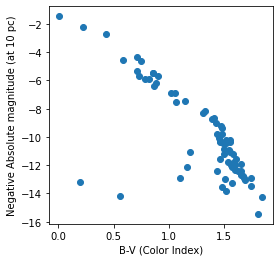

In [100]:
# Question 8:  Now make a color-magnitude diagram, with AbsV along y-axis, B-V along x-axis.
# Which of the 4 main star groups (main sequence, giants, etc.) can you identify on the plot?

fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(nearest_df['B-V'], -nearest_df['AbsV']) #plot negative 
ax.set_xlabel('B-V (Color Index)')
ax.set_ylabel('Negative Absolute magnitude (at 10 pc)')
---------
#I can identify some white dwarfs in the bottom left and many main sequence stars down the middle diagonal
---------

# Compare the distribution of the brightest stars versus the nearby stars. Do the nearby or the bright stars 
# provide a more typical example of the star population within the Milky Way Galaxy? 

-------
#The nearby stars are mostly on the main sequence, while the brightest stars are mostly either positioned on the 
#bottom left or upper right of the graph.
#The nearby stars provide a more typical example of the star population, since most of the stars are in the main sequence.
#Most of the brightest stars were not in the main sequence.
-------


# Would you expect the same percentage of stars to occupy each branch of the diagram if all stars 
# within the Milky Way Galaxy were plotted?

---------
#If all stars in the Milky Way were plotted, I would expect it to represent the nearby star graph much more than the 
#brightest star graph, with most of the stars in the main sequence.
---------


In [ ]:
# Question 9: What is the relationship between absolute magnitude and temperature of main sequence stars? 
# Does the same relationship hold for stars on the other branches of the H-R diagram? 

-----
#In the main sequence, as absolute magnitude increases, temperatre decreases. 
#This does not hold for white dwarfs or supernovas.
-----

In [ ]:
# Question 10:  Do you see any white dwarfs?  They are probably not very numerous.  Why not?
------
#There are only a few white dwarfs, likely because they have a low absolute magnitude and they are very small.